In [75]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2

def df(x):
    return 2 * x
    
def rmsprop(f, df, learning_rate=0.01, beta=0.9, epsilon=1e-6, num_iterations=100, x_init=0):
    x = x_init
    v = 0
    x_values = []
    loss_values = []
    for t in range(num_iterations):
        gradient = df(x)
        v = beta * v + (1 - beta) * gradient**2
        adjusted_lr = learning_rate / (np.sqrt(v) + epsilon)
        x = x - adjusted_lr * gradient
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values

def adam(f, df, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-6, num_iterations=100, x_init=0):
    x = x_init
    m = 0
    v = 0
    t = 0
    x_values = []
    loss_values = []
    for _ in range(num_iterations):
        t += 1
        gradient = df(x)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values

def sgd_with_momentum(f, df, learning_rate=0.01, momentum=1, epsilon=1e-6, num_iterations=100, x_init=0, error_variance=1, add_noise=True):
    x = x_init
    v = 0
    x_values = []
    loss_values = []
    for t in range(num_iterations):
        gradient = df(x)
        if add_noise:
            gradient += np.random.normal(0, np.sqrt(error_variance))  
        v = momentum * v + learning_rate * gradient
        x = x - v
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values

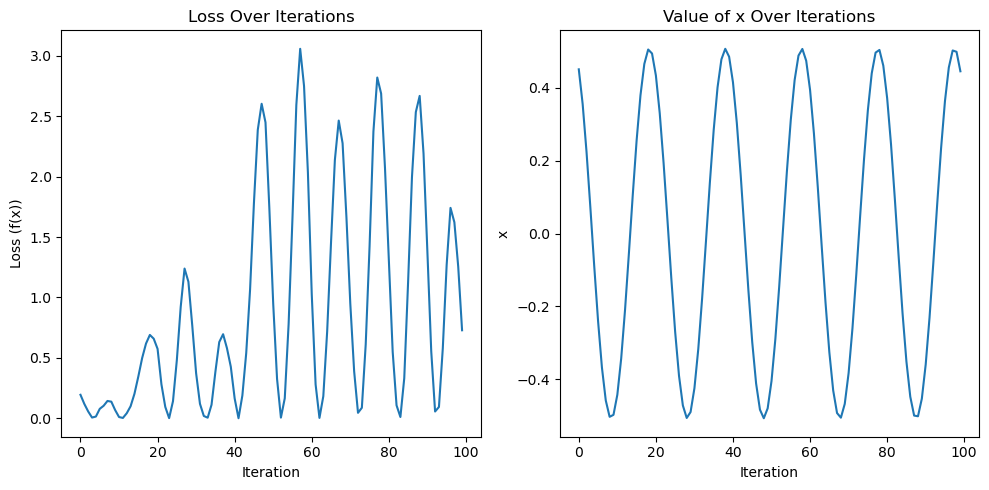

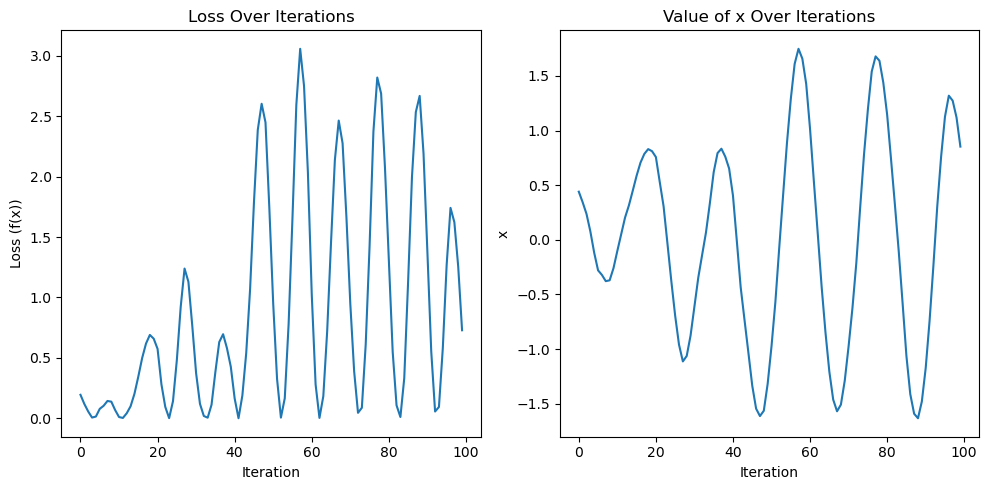

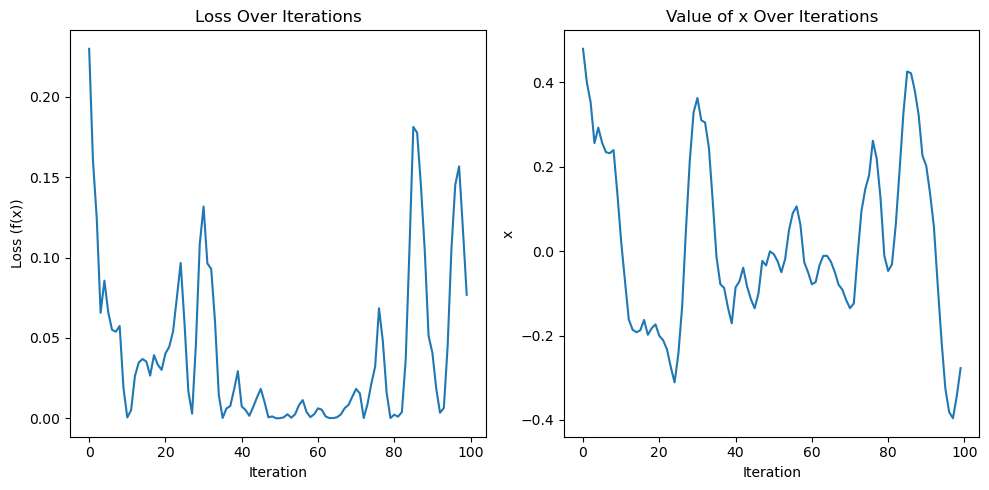

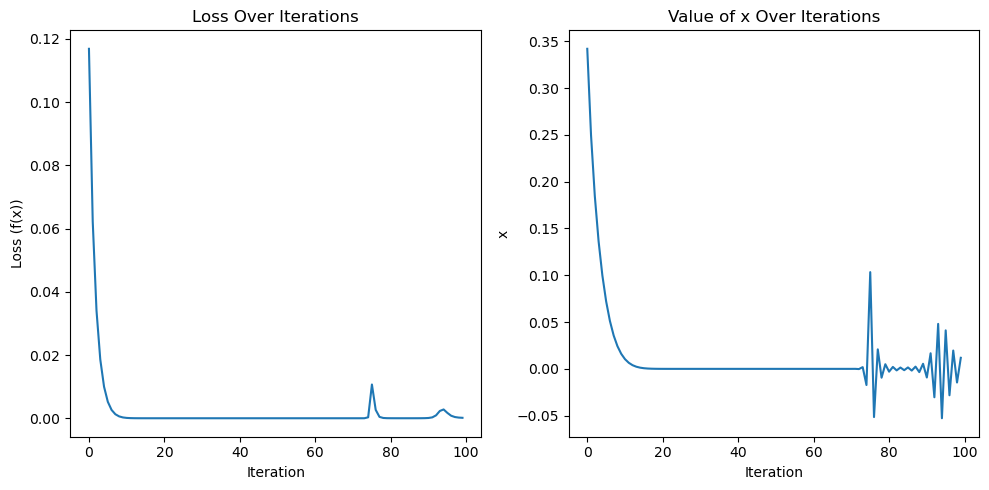

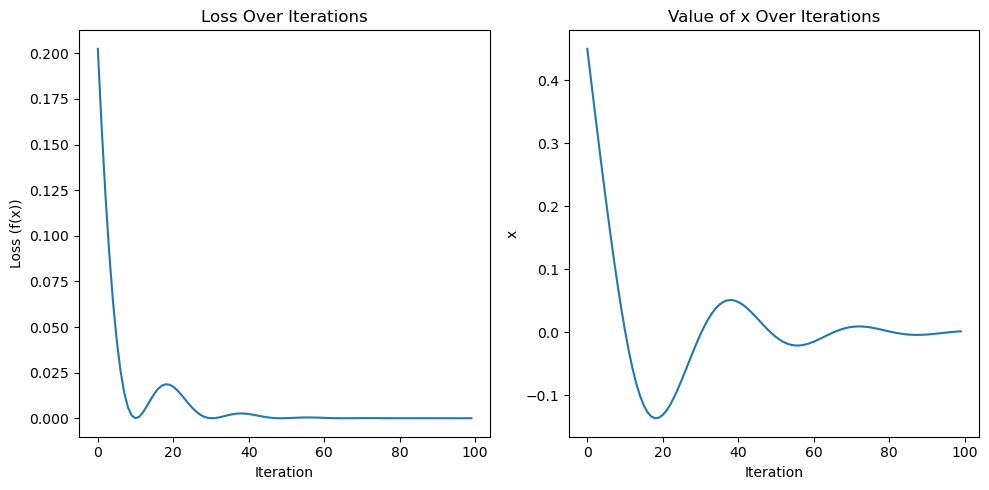

In [78]:
learning_rate = 0.05
beta = 0.9
num_iterations = 100
x_init = 0.5
momentum = 0.75
error_variance = 0.9

x_values_rms, loss_values_rms = rmsprop(f, df, learning_rate=learning_rate, beta=beta, num_iterations=num_iterations, x_init=x_init)
x_values_adam, loss_values_adam = adam(f, df, learning_rate=learning_rate, beta1=0.9, beta2=0.999, num_iterations=num_iterations, x_init=x_init)
x_values_sgd, loss_values_sgd = sgd_with_momentum(f, df, learning_rate=learning_rate, momentum=1, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance)
x_values_gd, loss_values_gd = sgd_with_momentum(f, df, learning_rate=learning_rate, num_iterations=num_iterations, x_init=x_init, add_noise=False)
x_values_sgdM, loss_values_sgdM = sgd_with_momentum(f, df, learning_rate=learning_rate, momentum=momentum, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance)


def plotting(x_values, loss_values):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_values)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (f(x))')
    
    plt.subplot(1, 2, 2)
    plt.plot(x_values)
    plt.title('Value of x Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    
    plt.tight_layout()
    plt.show()
plotting(x_values_gd, loss_values_sgd)    
plotting(x_values_sgd, loss_values_sgd)    
plotting(x_values_sgdM, loss_values_sgdM)
plotting(x_values_rms,loss_values_rms)
plotting(x_values_adam,loss_values_adam)

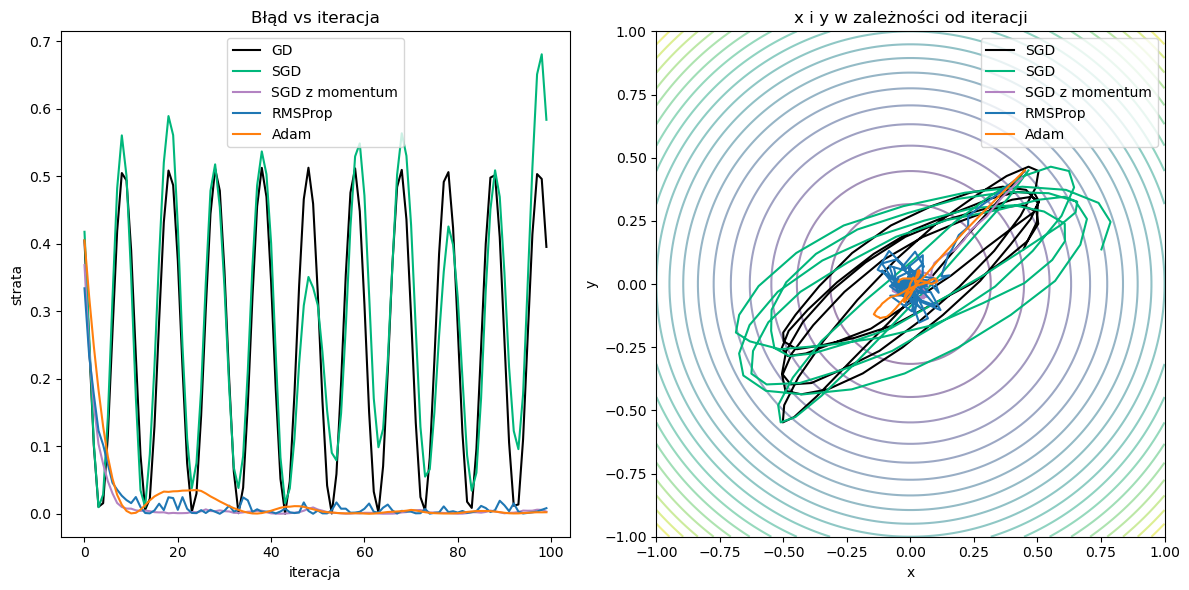

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def sgd_with_momentum(f, df, learning_rate=0.01, momentum=1, epsilon=1e-8, num_iterations=100, x_init=(5, 5), error_variance=1, add_noise=True):
    x = np.array(x_init)
    v = np.zeros_like(x)
    x_values = []
    loss_values = []
    for t in range(num_iterations):
        gradient = df(x)
        if add_noise:
            gradient += np.random.normal(0, np.sqrt(error_variance), size=x.shape)  # Add Gaussian noise to the gradient
        v = momentum * v + learning_rate * gradient
        x = x - v
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values

def rmsprop(f, df, learning_rate=0.01, beta=0.9, epsilon=1e-8, num_iterations=100, x_init=(5, 5), error_variance=1):
    x = np.array(x_init)
    v = np.zeros_like(x)
    x_values = []
    loss_values = []
    for t in range(num_iterations):
        gradient = df(x) + np.random.normal(0, np.sqrt(error_variance), size=x.shape)  # Add Gaussian noise to the gradient
        v = beta * v + (1 - beta) * gradient**2
        adjusted_lr = learning_rate / (np.sqrt(v) + epsilon)
        x = x - adjusted_lr * gradient
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values

def adam(f, df, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=100, x_init=(5, 5), error_variance=1):
    x = np.array(x_init)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    t = 0
    x_values = []
    loss_values = []
    for _ in range(num_iterations):
        t += 1
        gradient = df(x) + np.random.normal(0, np.sqrt(error_variance), size=x.shape)  # Add Gaussian noise to the gradient
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        x_values.append(x)
        loss_values.append(f(x))
    return x_values, loss_values


f = lambda x: x[0]**2 + x[1]**2
df = lambda x: np.array([2 * x[0], 2 * x[1]])

learning_rate = 0.05
beta = 0.7
num_iterations = 100
x_init = np.array([float(0.5),float(0.5)])
momentum = 0.5
error_variance = 0.05

x_values_gd, loss_values_gd = sgd_with_momentum(f, df, learning_rate=learning_rate, num_iterations=num_iterations, x_init=x_init, add_noise=False)
x_values_sgd, loss_values_sgd = sgd_with_momentum(f, df, learning_rate=learning_rate, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance)
x_values_sgdM, loss_values_sgdM = sgd_with_momentum(f, df, learning_rate=learning_rate, momentum=momentum, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance, add_noise=add_noise)
x_values_rms, loss_values_rms = rmsprop(f, df, learning_rate=learning_rate, beta=beta, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance)
x_values_adam, loss_values_adam = adam(f, df, learning_rate=learning_rate, beta1=0.9, beta2=0.999, num_iterations=num_iterations, x_init=x_init, error_variance=error_variance)

x_values_gd = np.array(x_values_gd)
x_values_sgd = np.array(x_values_sgd)
x_values_sgdM = np.array(x_values_sgdM)
x_values_rms = np.array(x_values_rms)
x_values_adam = np.array(x_values_adam)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_values_gd, label="GD",color = 'Black')
plt.plot(loss_values_sgd, label="SGD", color = '#00B77B')
plt.plot(loss_values_sgdM, label="SGD z momentum", color = '#B383C2')
plt.plot(loss_values_rms, label="RMSProp")
plt.plot(loss_values_adam, label="Adam")
plt.title('Błąd vs iteracja')
plt.xlabel('iteracja')
plt.ylabel('strata')
plt.legend()

plt.subplot(1, 2, 2)
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_range, y_range)

Z = f([X, Y]) 
plt.contour(X, Y, Z, 20, cmap='viridis', alpha=0.5)

plt.plot(x_values_gd[:, 0], x_values_sgd[:, 1], label="SGD", color = 'Black')
plt.plot(x_values_sgd[:, 0], x_values_sgd[:, 1], label="SGD", color = '#00B77B')
plt.plot(x_values_sgdM[:, 0], x_values_sgdM[:, 1], label="SGD z momentum", color = '#B383C2')
plt.plot(x_values_rms[:, 0], x_values_rms[:, 1], label="RMSProp")
plt.plot(x_values_adam[:, 0], x_values_adam[:, 1], label="Adam")
plt.title('x i y w zależności od iteracji')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()